In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

In [315]:
df = pd.read_csv('final_data/combined_data_with.csv')

In [316]:
df = df.drop(columns=['sum_y'])
df = df.dropna()
df.shape

(2144, 114)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2145
Columns: 114 entries, Flow ID to Label
dtypes: float64(56), int64(53), object(5)
memory usage: 1.9+ MB


In [318]:
object_columns = df.select_dtypes(include=['object']).columns
float_columns = df.select_dtypes(include=['float64']).columns

In [319]:
df_int = df.astype({col: 'int' for col in float_columns})
int_columns = df_int.select_dtypes(include=['int64']).columns

In [320]:
df_int = df_int[int_columns]
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2145
Columns: 109 entries, Src Port to Label_val
dtypes: int64(109)
memory usage: 1.8 MB


In [321]:
df_num = df[int_columns]
df_num = df_num[df_num['Label_val'] != 4]
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2135 entries, 0 to 2145
Columns: 109 entries, Src Port to Label_val
dtypes: float64(56), int64(53)
memory usage: 1.8 MB


In [325]:
df_num.to_csv('pfcp_tcp_udp/data_pfcp_with_labels.csv', index=False)

## 2 Models test ( RandomForest + GradientBoosting )

python(71837) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(71838) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(71839) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(71840) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(71841) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(71842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(71843) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(71844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/michaltajak/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
675 fits failed out of a total of 2025.
The score on these train-test partitions for these para

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.9508196721311475


<Axes: >

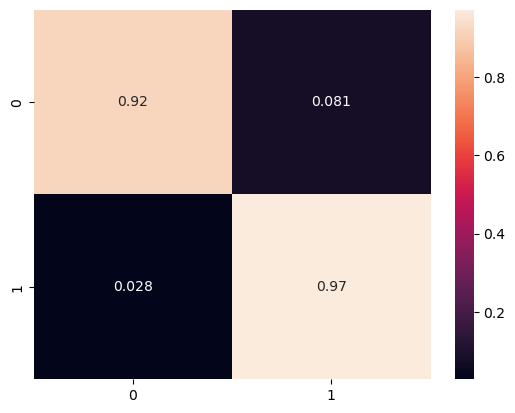

In [326]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns

y = df_num['Label_val']
X = df_num.drop(columns=['Label_val'])
y_binary = (y == 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='recall', cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)


best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
cfm = cf_matrix / np.sum(cf_matrix, axis=1)[:, None]

sns.heatmap(cfm, annot=True)

Accuracy: 0.9808429118773946


<Axes: >

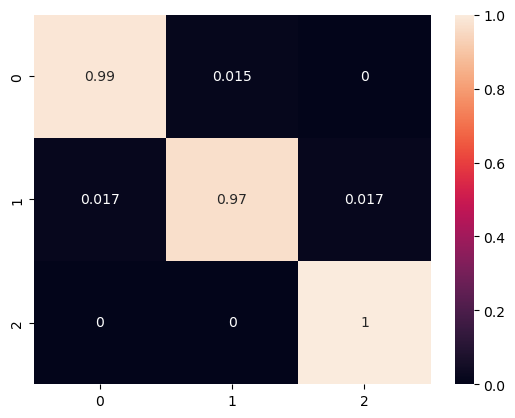

In [312]:
y_multiclass = df_num['Label_val'] - 1 
X_multi = df_num[df_num['Label_val'] != 0].drop(columns=['Label_val'])
y_multi = y_multiclass[df_num['Label_val'] != 0]

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

X_train_multi = scaler.fit_transform(X_train_multi)
X_test_multi = scaler.transform(X_test_multi)

gb = GradientBoostingClassifier(random_state=42, n_estimators = 100)
gb.fit(X_train_multi, y_train_multi)

y_pred_multi = gb.predict(X_test_multi)
print("Accuracy:", accuracy_score(y_test_multi, y_pred_multi))

cf_matrix_multi = confusion_matrix(y_test_multi, y_pred_multi)
cfm_multi = cf_matrix_multi / np.sum(cf_matrix_multi, axis=1)[:, None]

sns.heatmap(cfm_multi, annot=True)


Accuracy: 0.955503512880562


<Axes: >

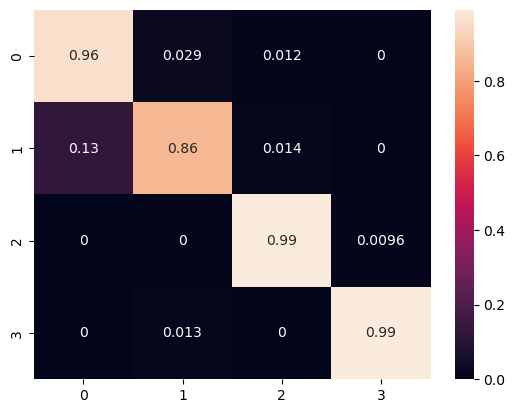

In [313]:
y = df_num['Label_val']
X = df_num.drop(columns=['Label_val'])
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_multi = scaler.fit_transform(X_train_multi)
X_test_multi = scaler.transform(X_test_multi)

gb = GradientBoostingClassifier(random_state=42, n_estimators = 100)
gb.fit(X_train_multi, y_train_multi)

y_pred_multi = gb.predict(X_test_multi)
print("Accuracy:", accuracy_score(y_test_multi, y_pred_multi))

cf_matrix_multi = confusion_matrix(y_test_multi, y_pred_multi)
cfm_multi = cf_matrix_multi / np.sum(cf_matrix_multi, axis=1)[:, None]

sns.heatmap(cfm_multi, annot=True)


## Merge models (RF + GB) -> take the best param

cm_diag [0.971 0.913 0.98  0.983]


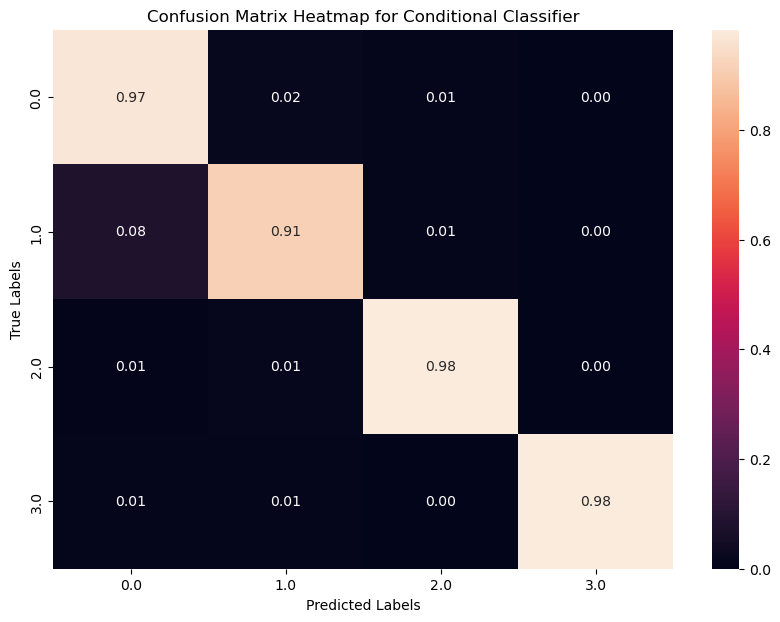

In [301]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin

# Definicja ConditionalClassifier
class ConditionalClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, binary_clf, multiclass_clf):
        self.binary_clf = binary_clf
        self.multiclass_clf = multiclass_clf

    def fit(self, X, y):
        self.binary_clf.fit(X, y)
        binary_preds = self.binary_clf.predict(X)
        X_multiclass = X[binary_preds != 0]
        y_multiclass = y[binary_preds != 0]
        self.multiclass_clf.fit(X_multiclass, y_multiclass)
        
        return self

    def predict(self, X):
        binary_preds = self.binary_clf.predict(X)
        final_preds = np.copy(binary_preds)
        X_multiclass = X[binary_preds != 0]
        multiclass_preds = self.multiclass_clf.predict(X_multiclass)
        final_preds[binary_preds != 0] = multiclass_preds
        
        return final_preds

X = df_num.drop(columns=['Label_val'])
y = df_num['Label_val']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

binary_clf = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=500,
    random_state=42
)

multiclass_clf = GradientBoostingClassifier(n_estimators=100)  

conditional_clf = ConditionalClassifier(binary_clf, multiclass_clf)

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('clf', conditional_clf)       
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
conditional_accuracy = accuracy_score(y_test, y_pred)

cf_matrix = confusion_matrix(y_test, y_pred)
cfm = cf_matrix / np.sum(cf_matrix, axis=1)[:, None]
df_cm = pd.DataFrame(cfm, index=np.unique(y), columns=np.unique(y))

with np.printoptions(precision=3, suppress=True):
    print('cm_diag', np.diag(df_cm))

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cbar=True, 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Conditional Classifier')
plt.show()


## Merge models (GAN discriminator + GB)

Epoch [1000/2000], Loss: 0.1928
Epoch [2000/2000], Loss: 0.1347
[[9.9999452e-01]
 [9.9999940e-01]
 [1.7288828e-04]
 ...
 [1.3011817e-03]
 [2.9876089e-14]
 [1.7440607e-04]]
1494
(1494, 108)
(1494,)
Conditional Classifier Accuracy: 0.9469578783151326
cm_diag [0.927 0.913 0.98  0.983]


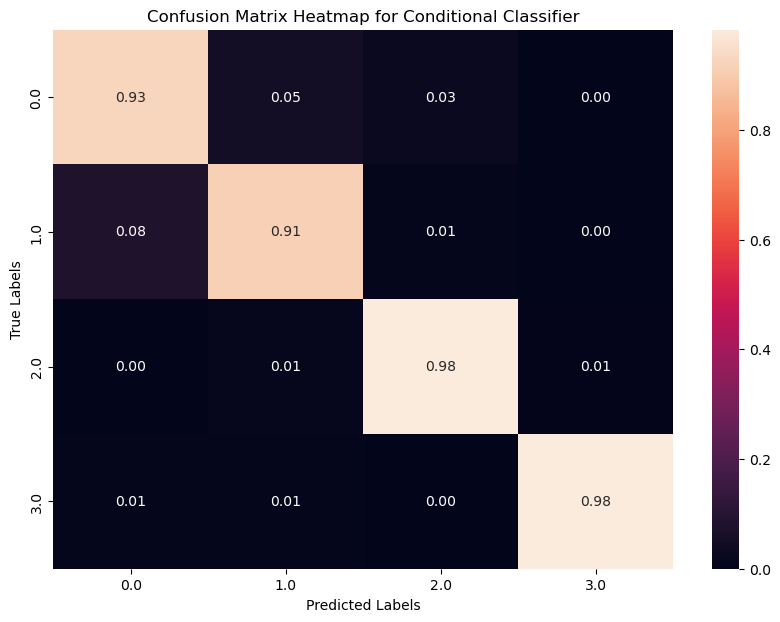

In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Definicja Discriminatora
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Definicja ConditionalClassifier
class ConditionalClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, binary_clf, multiclass_clf, scaler):
        self.binary_clf = binary_clf
        self.multiclass_clf = multiclass_clf
        self.scaler = scaler
        
    def fit(self, X, y):
        X = self.scaler.transform(X)
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor((y > 0).astype(int).values, dtype=torch.float32).view(-1, 1)
        self.binary_clf.train()
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.binary_clf.parameters(), lr=0.0001)
        epochs = 2000

        for epoch in range(epochs):
            outputs = self.binary_clf(X_tensor)
            loss = criterion(outputs, y_tensor)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 1000 == 0:
                print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

        with torch.no_grad():
            print(self.binary_clf(X_tensor).numpy())
            binary_preds = (self.binary_clf(X_tensor).numpy() > 0.5).astype(int).flatten()
            
        mask = binary_preds != 0
        print(len(mask))
        print(X.shape)
        print(y.shape)
        X_multiclass = X[binary_preds != 0,:]
        y_multiclass = y[binary_preds != 0]
        self.multiclass_clf.fit(X_multiclass, y_multiclass)
        
        return self

    def predict(self, X):
        X = self.scaler.transform(X)
        X_tensor = torch.tensor(X, dtype=torch.float32)
        
        with torch.no_grad():
            binary_preds = (self.binary_clf(X_tensor).numpy() > 0.5).astype(int).flatten()
        
        X_multiclass = X[binary_preds != 0]
        multiclass_preds = self.multiclass_clf.predict(X_multiclass)
        final_preds = np.copy(binary_preds)
        final_preds[binary_preds != 0] = multiclass_preds       
        return final_preds 

X = df_num.drop(columns=['Label_val'])
y = df_num['Label_val']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

input_dim = X_train.shape[1]
discriminator = Discriminator(input_dim)
multiclass_clf = GradientBoostingClassifier(n_estimators=100)

conditional_clf = ConditionalClassifier(discriminator, multiclass_clf, scaler)

conditional_clf.fit(X_train, y_train)
y_pred = conditional_clf.predict(X_test)

conditional_accuracy = accuracy_score(y_test, y_pred)
print("Conditional Classifier Accuracy:", conditional_accuracy)

cf_matrix = confusion_matrix(y_test, y_pred)
cfm = cf_matrix / np.sum(cf_matrix, axis=1)[:, None]
df_cm = pd.DataFrame(cfm, index=np.unique(y), columns=np.unique(y))

with np.printoptions(precision=3, suppress=True):
    print('cm_diag', np.diag(df_cm))

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cbar=True, 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Conditional Classifier')
plt.show()

### GAN first step

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import pandas as pd

# Define the Discriminator model
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 48)
        self.fc4 = nn.Linear(48, 1)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Prepare the data
X = df_num.drop(columns=['Label_val'])
y = (df_num['Label_val'] == 0).astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
discriminator = Discriminator(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(discriminator.parameters(), lr=0.0001)

# Training the model
epochs = 2000
batch_size = 32

for epoch in range(epochs):
    # Forward pass
    outputs = discriminator(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Predict on the test set
discriminator.eval()
with torch.no_grad():
    y_pred_prob = discriminator(X_test).numpy()
    y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
f1 = f1_score(y_test.numpy(), y_pred)
precision = precision_score(y_test.numpy(), y_pred)
recall = recall_score(y_test.numpy(), y_pred)

print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Confusion matrix and heatmap
cf_matrix = confusion_matrix(y_test.numpy(), y_pred)
cfm = cf_matrix / np.sum(cf_matrix, axis=1)[:, None]
df_cm = pd.DataFrame(cfm, index=range(2), columns=range(2))

sns.heatmap(df_cm, annot=True)


# Tests

## Random

/Users/michaltajak/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Najlepsze parametry:
{'clf__binary_clf__max_depth': 20, 'clf__binary_clf__min_samples_leaf': 4, 'clf__binary_clf__min_samples_split': 10, 'clf__binary_clf__n_estimators': 200, 'clf__multiclass_clf__learning_rate': 0.2, 'clf__multiclass_clf__n_estimators': 150}
Najlepszy wynik:
0.9337349397590362
cm_diag [0.963 0.893 0.953 0.983]


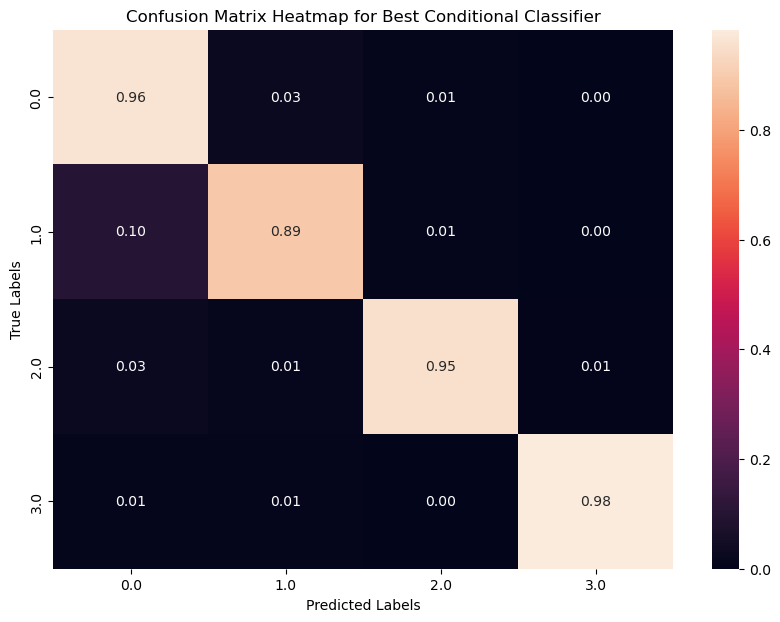

In [302]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Definicja siatek parametrów dla RandomForestClassifier i GradientBoostingClassifier
param_grid = {
    'clf__binary_clf__n_estimators': [100, 200, 300],
    'clf__binary_clf__max_depth': [10, 20, 30],
    'clf__binary_clf__min_samples_split': [2, 5, 10],
    'clf__binary_clf__min_samples_leaf': [1, 2, 4],
    'clf__multiclass_clf__n_estimators': [50, 100, 150],
    'clf__multiclass_clf__learning_rate': [0.01, 0.1, 0.2]
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=0, n_jobs=-1)

# Dopasowanie GridSearchCV do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepsze parametry i wynik
print("Najlepsze parametry:")
print(grid_search.best_params_)
print("Najlepszy wynik:")
print(grid_search.best_score_)

# Ocena na zbiorze testowym
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)
conditional_accuracy = accuracy_score(y_test, y_pred)

cf_matrix = confusion_matrix(y_test, y_pred)
cfm = cf_matrix / np.sum(cf_matrix, axis=1)[:, None]
df_cm = pd.DataFrame(cfm, index=np.unique(y), columns=np.unique(y))

with np.printoptions(precision=3, suppress=True):
    print('cm_diag', np.diag(df_cm))

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cbar=True, 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Best Conditional Classifier')
plt.show()


Params: {'epochs': 1000, 'hidden_dims': (256, 128, 64), 'learning_rate': 0.01}, F1 Score: 0.9488248400088729
Params: {'epochs': 1000, 'hidden_dims': (256, 128, 64), 'learning_rate': 0.001}, F1 Score: 0.9470052939102691
Params: {'epochs': 1000, 'hidden_dims': (256, 128, 64), 'learning_rate': 0.0001}, F1 Score: 0.9487953780505012
Params: {'epochs': 1000, 'hidden_dims': (256, 128, 64), 'learning_rate': 1e-05}, F1 Score: 0.9549032436786304
Params: {'epochs': 1000, 'hidden_dims': (512, 256, 128), 'learning_rate': 0.01}, F1 Score: 0.9503832846377874
Params: {'epochs': 1000, 'hidden_dims': (512, 256, 128), 'learning_rate': 0.001}, F1 Score: 0.9503832846377874
Params: {'epochs': 1000, 'hidden_dims': (512, 256, 128), 'learning_rate': 0.0001}, F1 Score: 0.9440878779719185
Params: {'epochs': 1000, 'hidden_dims': (512, 256, 128), 'learning_rate': 1e-05}, F1 Score: 0.9563390021026795
Params: {'epochs': 1000, 'hidden_dims': (128, 64, 32), 'learning_rate': 0.01}, F1 Score: 0.9551032269345253
Params: 

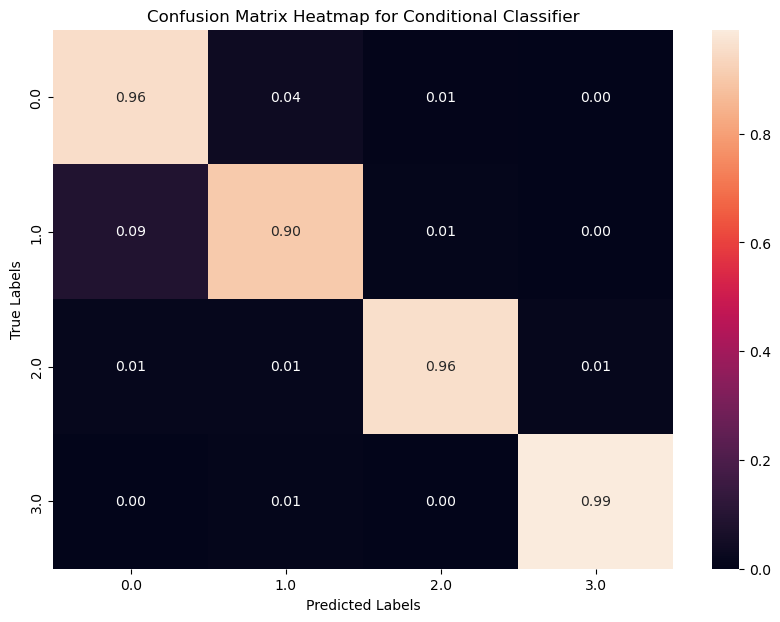

In [300]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

# Define Discriminator class
class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dims):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.fc4 = nn.Linear(hidden_dims[2], 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Define ConditionalClassifier class
class ConditionalClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, binary_clf, multiclass_clf, scaler, learning_rate, epochs):
        self.binary_clf = binary_clf
        self.multiclass_clf = multiclass_clf
        self.scaler = scaler
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self, X, y):
        X = self.scaler.transform(X)
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor((y > 0).astype(int).values, dtype=torch.float32).view(-1, 1)
        self.binary_clf.train()
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.binary_clf.parameters(), lr=self.learning_rate)

        for epoch in range(self.epochs):
            outputs = self.binary_clf(X_tensor)
            loss = criterion(outputs, y_tensor)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            binary_preds = (self.binary_clf(X_tensor).numpy() > 0.5).astype(int).flatten()
            
        mask = binary_preds != 0
        X_multiclass = X[mask,:]
        y_multiclass = y[mask]
        self.multiclass_clf.fit(X_multiclass, y_multiclass)
        
        return self

    def predict(self, X):
        X = self.scaler.transform(X)
        X_tensor = torch.tensor(X, dtype=torch.float32)
        
        with torch.no_grad():
            binary_preds = (self.binary_clf(X_tensor).numpy() > 0.5).astype(int).flatten()
        
        X_multiclass = X[binary_preds != 0]
        multiclass_preds = self.multiclass_clf.predict(X_multiclass)
        final_preds = np.copy(binary_preds)
        final_preds[binary_preds != 0] = multiclass_preds       
        return final_preds

# Prepare data (assuming df_num is defined)
X = df_num.drop(columns=['Label_val'])
y = df_num['Label_val']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

# Initialize the multiclass classifier
multiclass_clf = GradientBoostingClassifier(n_estimators=100)

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.001, 0.0001, 0.00001],
    'epochs': [1000, 2000, 3000],
    'hidden_dims': [(256, 128, 64), (512, 256, 128), (128, 64, 32)]
}

# Prepare grid search
best_f1 = 0.0
best_params = None
best_model = None

# Iterate over all parameter combinations
for params in ParameterGrid(param_grid):
    # Create a new Discriminator with the given architecture
    input_dim = X_train.shape[1]
    discriminator = Discriminator(input_dim, params['hidden_dims'])

    # Create the ConditionalClassifier
    conditional_clf = ConditionalClassifier(discriminator, multiclass_clf, scaler, 
                                            learning_rate=params['learning_rate'], 
                                            epochs=params['epochs'])
    
    # Train the model with current hyperparameters
    conditional_clf.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = conditional_clf.predict(X_test)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Params: {params}, F1 Score: {f1}")
    
    # Update the best model if the current one is better
    if f1 > best_f1:
        best_f1 = f1
        best_params = params
        best_model = conditional_clf

print(f"Best Parameters: {best_params}")
print(f"Best Validation F1 Score: {best_f1}")
y_pred = best_model.predict(X_test)

f_matrix = confusion_matrix(y_test, y_pred)
cfm = f_matrix / np.sum(f_matrix, axis=1)[:, None]
df_cm = pd.DataFrame(cfm, index=np.unique(y), columns=np.unique(y))
with np.printoptions(precision=3, suppress=True):
    print('cm_diag', np.diag(df_cm))

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cbar=True, 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Conditional Classifier')
plt.show()